# Matplotlib Annotations

In [3]:
import pandas as pd
import duckdb

df = pd.read_csv("data/1900-census-immigrant-pop-metro.csv")

df.head()

,City,State,Error,Total foreign born,Africa,"Asia (except China, Japan, and India)",Atlantic Islands,Australia,Austria,Belgium,...,Scotland,South America,Spain,Sweden,Switzerland,Turkey,Wales,West Indies (except Cuba and Puerto Rico),Other countries,Born at sea
0,Akron,Ohio,0,"7,127",4.0,NaN,NaN,1,190,9,...,187,1.0,2,200,258,NaN,226,8,NaN,6.0
1,Albany,New York,55,"17,718",3.0,39.0,4,13,106,13,...,395,1.0,1,65,64,21,80,4,3.0,15.0
2,Allegheny,Pennsylvania,0,"30,216",4.0,5.0,2,8,"3,929",10,...,"1,183",2.0,2,186,488,4,798,4,3.0,25.0
3,Allentown,Pennsylvania,3,"2,991",NaN,1.0,NaN,2,337,2,...,66,1.0,NaN,5,26,3,40,2,3.0,1.0
4,Altoona,Pennsylvania,65,"3,301",2.0,7.0,NaN,NaN,57,2,...,98,2.0,1,32,55,25,23,1,8.0,4.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 50 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   City                                         161 non-null    object 
 1   State                                        161 non-null    object 
 2   Error                                        161 non-null    int64  
 3   Total foreign born                           161 non-null    object 
 4   Africa                                       120 non-null    float64
 5   Asia (except China, Japan, and India)        133 non-null    float64
 6   Atlantic Islands                             99 non-null     object 
 7   Australia                                    136 non-null    object 
 8   Austria                                      161 non-null    object 
 9   Belgium                                      145 non-null    object 
 10  Bo

In [22]:
df["Total foreign born"].iloc[0]

7127

In [23]:
columns = ["Sweden", "Norway", "Finland", "Denmark", "Total foreign born"]

df_nordic = df[columns]
df_nordic.head()

,Sweden,Norway,Finland,Denmark,Total foreign born
0,200,59,1,105,7127
1,65,12,3,21,17718
2,186,9,5,15,30216
3,5,2,0,5,2991
4,32,4,3,5,3301


In [20]:
df_nordic = df_nordic.fillna("0")

In [ ]:
for column in columns:
    df[column] = df_nordic[column].str.replace(",", "").astype(int)

df_nordic

In [27]:
df_nordic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Sweden              161 non-null    object
 1   Norway              161 non-null    object
 2   Finland             161 non-null    object
 3   Denmark             161 non-null    object
 4   Total foreign born  161 non-null    object
dtypes: object(5)
memory usage: 6.4+ KB


In [ ]:
df_nordic = duckdb.query(
    """--sql
    WITH nordic AS (
        FROM df
            SELECT
                state,
                SUM("Total foreign born") AS "Total foreigners",
                SUM(sweden) AS Swedes,
                SUM(norway) AS Norweigans,
                SUM(denmark) AS Danish,
                SUM(finland) AS Finnish
            GROUP BY
                state
    )
    FROM nordic n
    SELECT *, n.swedes + n.norweigans + n.danish + n.finnish AS Nordic
    ORDER BY
        nordic
    DESC
""").df()

df_nordic

,State,Total foreigners,Swedes,Norweigans,Danish,Finnish,Nordic
0,Illinois,627465.0,57158.0,22300.0,10374.0,447.0,90279.0
1,Minnesota,128823.0,34984.0,17087.0,2975.0,1101.0,56147.0
2,New York,1521931.0,29961.0,11752.0,6186.0,3764.0,51663.0
3,Massachusetts,567170.0,21971.0,2366.0,1451.0,3154.0,28942.0
4,Wisconsin,124230.0,4034.0,6485.0,4024.0,405.0,14948.0
5,California,160828.0,7223.0,2729.0,3082.0,986.0,14020.0
6,Washington,40868.0,5150.0,3686.0,1193.0,603.0,10632.0
7,Pennsylvania,514506.0,5986.0,861.0,1210.0,378.0,8435.0
8,Nebraska,34456.0,4864.0,457.0,2888.0,11.0,8220.0
9,Connecticut,101502.0,6647.0,273.0,1144.0,41.0,8105.0


In [36]:
df_nordic.shape

(39, 7)

In [39]:
import matplotlib.pyplot as plt

top_3_nordic = df_nordic.drop(["Total foreigners", "Nordic"], axis=1).set_index("State").iloc[:3]

top_3_nordic

,Swedes,Norweigans,Danish,Finnish
State,,,,
Illinois,57158.0,22300.0,10374.0,447.0
Minnesota,34984.0,17087.0,2975.0,1101.0
New York,29961.0,11752.0,6186.0,3764.0


(<Figure size 1200x600 with 1 Axes>, <Axes: xlabel='State'>)

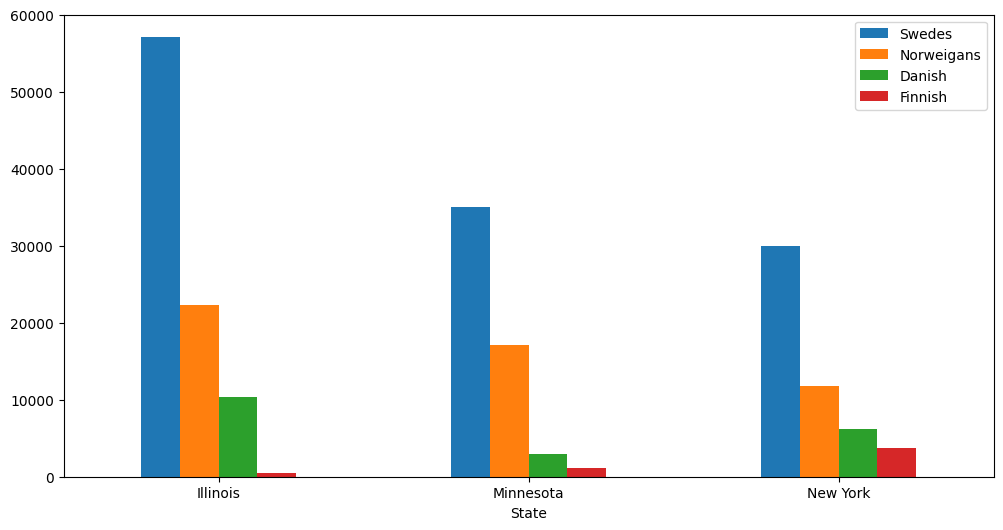

In [45]:
def nordic_plot():
    ax = top_3_nordic.plot(kind='bar', figsize=(12,6))
    ax.set_xticklabels(top_3_nordic.index, rotation = 0)

    fig = ax.get_figure()

    return fig, ax

nordic_plot()

[<BarContainer object of 3 artists>,
 <BarContainer object of 3 artists>,
 <BarContainer object of 3 artists>,
 <BarContainer object of 3 artists>]

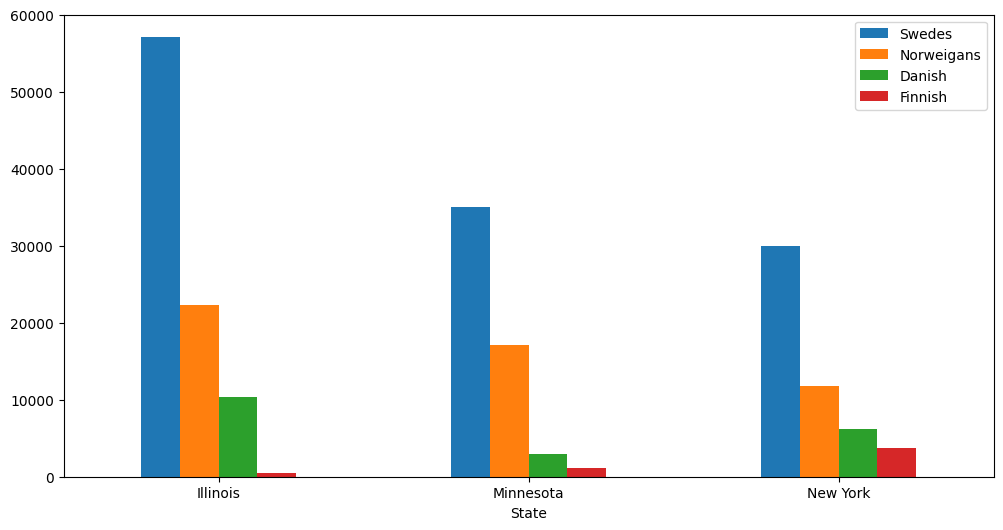

In [46]:
fig, ax = nordic_plot()

ax.containers

In [47]:
ax.containers[0]

<BarContainer object of 3 artists>

In [51]:
ax.containers[0][1].get_height(), ax.containers[0][1].get_x()

(np.float64(34984.0), np.float64(0.75))

## Annotate

Text(0.8, 42000, 'Swedes')

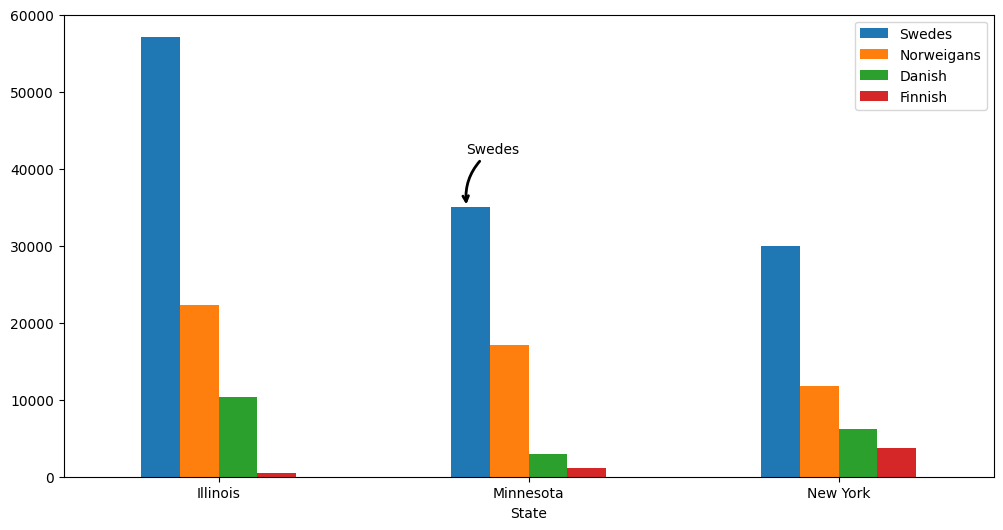

In [61]:
fig, ax = nordic_plot()

arrowprops = dict(arrowstyle = "->", linewidth=2, connectionstyle = "arc3, rad=.3")
ax.annotate(text = "Swedes", xy=(0.8, 35000), arrowprops=arrowprops, xytext=(0.8, 42000))

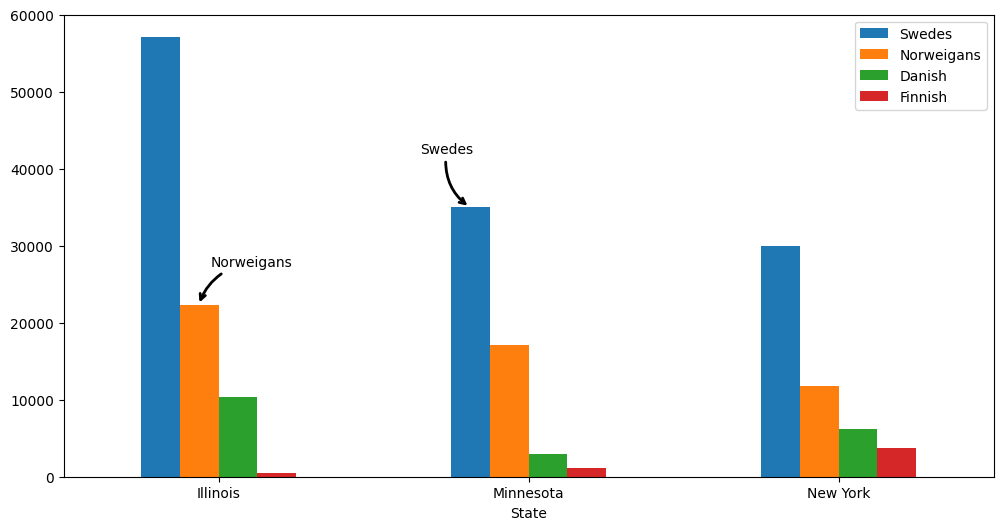

In [ ]:
fig, ax = nordic_plot()

# tuple unpacking of ax.containers that is a list of four BarContainers, which contains 3 Artists each
swede_bars, norweigan_bars, danish_bars, finnish_bars = ax.containers

def annotate_nordic(bar_artist, text, x_offset, y_offset):

    xy = (bar_artist.get_x(), bar_artist.get_height())

    # ternary if-statement
    rad = 0.3 if xy[0] < 0 else -0.3

    arrowprops = dict(arrowstyle = "->", linewidth=2, connectionstyle = "arc3, rad=.3")
    ax.annotate(
        text = text,
        xy=(xy[0] + 0.06, xy[1]), 
        arrowprops=arrowprops, 
        xytext=(xy[0] + x_offset, xy[1] + y_offset),
        )

annotate_nordic(swede_bars[1], "Swedes", -0.1, 7000)
annotate_nordic(norweigan_bars[0], "Norweigans", 0.1, 5000)

# draw other annotations
# add labels and title
# remove legend
# save the figure